# Linear Regression with Python

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Upload dataset in colab session

In [2]:
from google.colab import files
data = files.upload()

Saving USA_Housing.csv to USA_Housing.csv


Load dataset (data file) in dataframe

In [3]:
df = pd.read_csv("USA_Housing.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


Drop address column

In [9]:
df.drop('Address',axis=1,inplace=True)

In [10]:
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.558
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.915


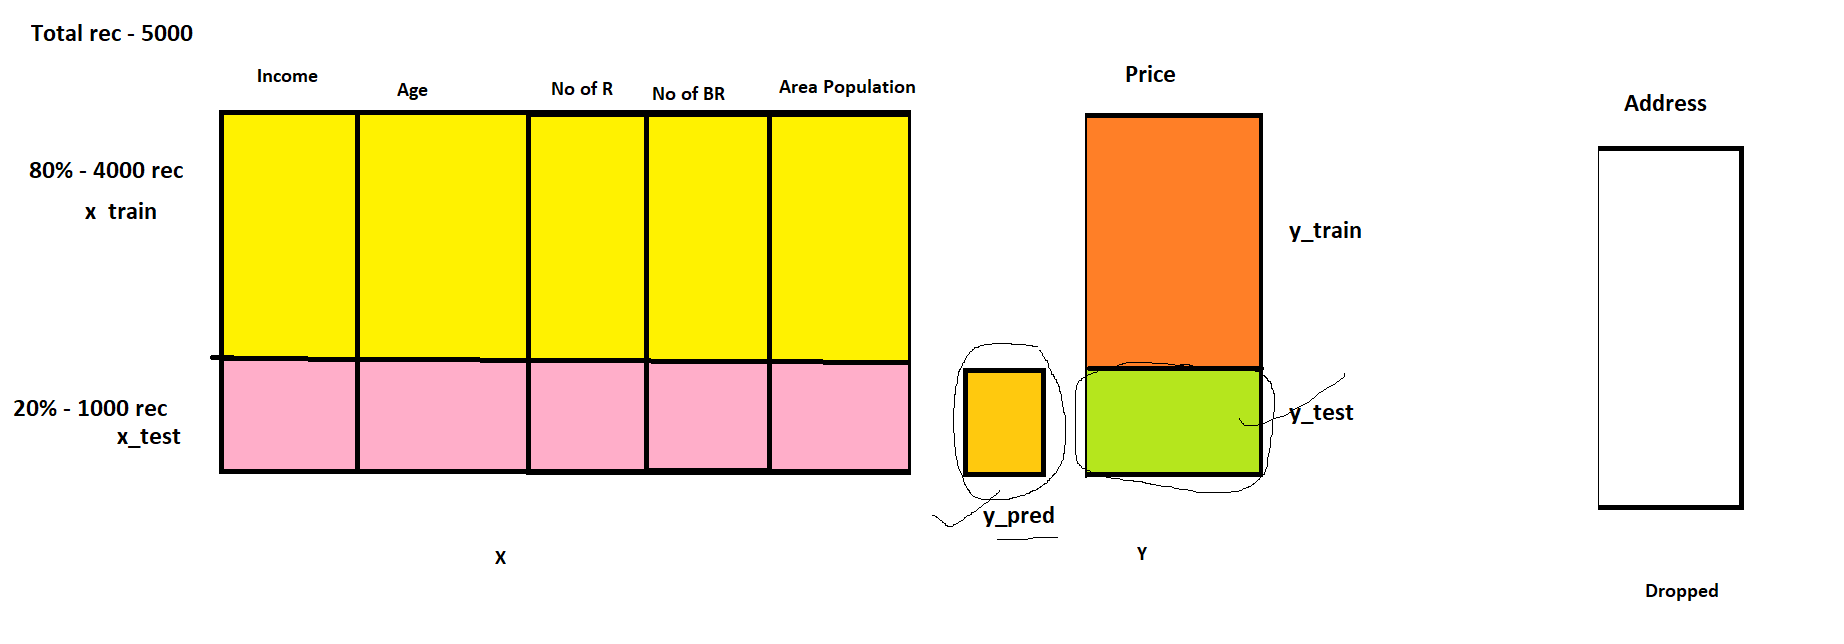

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [11]:
x = df.drop('Price',axis=1)
y = df['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x,y,train_size=0.8)

In [14]:
x_train.shape

(4000, 5)

In [15]:
x_test.shape

(1000, 5)

## Creating and Training the Model

In [19]:
from sklearn.linear_model import LinearRegression

Create object

In [20]:
linreg = LinearRegression()

Train the model

In [21]:
linreg.fit(x_train,y_train)

LinearRegression()

Test th Model and capture results in a variable

In [22]:
y_pred = linreg.predict(x_test)

In [23]:
y_pred.shape

(1000,)

Compare actual price which are in y_test , with predicted price which are in y_pred

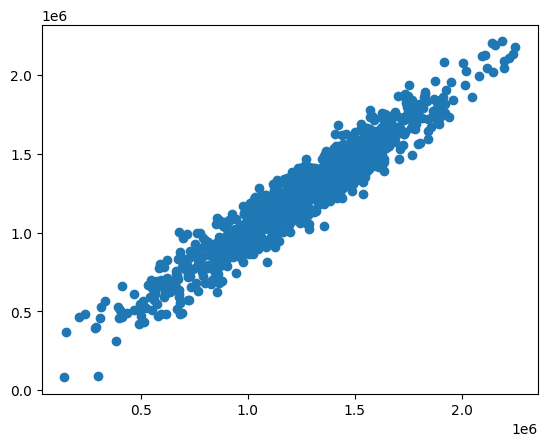

In [33]:
plt.scatter(y_test,y_pred)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [34]:
95 - 90

5

In [35]:
80 - 85

-5

In [37]:
from sklearn import metrics

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 83790.54911398597


In [39]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 10622866013.739557


In [40]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 103067.288766803
